In [1]:
using DataFrames, CSV, Plots, GLM, Statistics, StatsPlots, MLBase, Distributions, StatsBase, StatsModels

In [2]:
cd("/Users/ning/Data/Dropbox/Working_Directory/Python/Stat_models/Julia/3_linear_regression")

In [3]:
df = DataFrame(CSV.File("econmath.csv"));

first(df,5)

,age,work,study,econhs,colgpa,hsgpa,acteng,actmth,act,mathscr
,Int64,Float64,Float64,Int64,Float64,Float64,Int64?,Int64?,Int64?,Int64
1,23,15.0,10.0,0,3.4909,3.355,24,26,27,10
2,23,0.0,22.5,1,2.1,3.219,23,20,24,9
3,21,25.0,12.0,0,3.0851,3.306,21,24,21,8
4,22,30.0,40.0,0,2.6805,3.977,31,28,31,10
5,22,25.0,15.0,1,3.7454,3.89,28,31,32,8


In [4]:
size(df)

(856, 17)

In [5]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,Type
1,age,19.4065,18,19.0,29,0,Int64
2,work,8.62558,0.0,8.0,37.5,0,Float64
3,study,13.918,0.0,12.0,50.0,0,Float64
4,econhs,0.370327,0,0.0,1,0,Int64
5,colgpa,2.81469,0.875,2.8129,4.0,0,Float64
6,hsgpa,3.34243,2.355,3.3215,4.26,0,Float64
7,acteng,22.5946,12,23.0,34,42,"Union{Missing, Int64}"
8,actmth,23.2113,12,23.0,36,42,"Union{Missing, Int64}"
9,act,23.1216,13,23.0,33,42,"Union{Missing, Int64}"


In [6]:
names(df)

17-element Vector{String}:
 "age"
 "work"
 "study"
 "econhs"
 "colgpa"
 "hsgpa"
 "acteng"
 "actmth"
 "act"
 "mathscr"
 "male"
 "calculus"
 "attexc"
 "attgood"
 "fathcoll"
 "mothcoll"
 "score"

In [7]:
fm = @formula(score ~ 1 + calculus + colgpa)
OLS_model = lm(fm, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

score ~ 1 + calculus + colgpa

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  30.4297     1.97787   15.39    <1e-46   26.5476     34.3117
calculus      5.19148    0.789874   6.57    <1e-10    3.64115     6.7418
colgpa       13.7346     0.688732  19.94    <1e-72   12.3828     15.0864
────────────────────────────────────────────────────────────────────────

In [8]:
r2(OLS_model)

0.36127050946010375

In [9]:
adjr2(OLS_model)

0.3597729022138202

In [10]:
bic(OLS_model)

6514.671240703162

In [11]:
aic(OLS_model)

6495.662159198595

In [12]:
aicc(OLS_model)

6495.70916272386

In [13]:
coef(OLS_model)

3-element Vector{Float64}:
 30.42967967130442
  5.191475793563056
 13.734605936633024

In [14]:
coefnames(OLS_model)

3-element Vector{String}:
 "(Intercept)"
 "calculus"
 "colgpa"

In [15]:
vcov(OLS_model)

3×3 Matrix{Float64}:
  3.91195  -0.2255     -1.28793
 -0.2255    0.6239     -0.0698149
 -1.28793  -0.0698149   0.474352

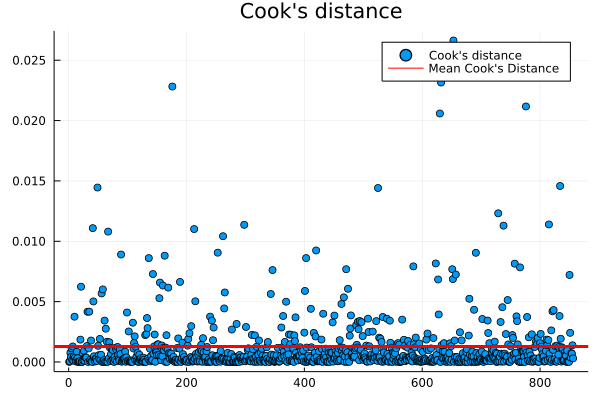

In [16]:
scatter(range(1,856,step=1), cooksdistance(OLS_model), label="Cook's distance", title="Cook's distance")
hline!([mean(cooksdistance(OLS_model))], lw = 3, linecolor="red", label = "Mean Cook's Distance")

In [17]:
dof_residual(OLS_model)

853.0

In [18]:
stderror(OLS_model)

3-element Vector{Float64}:
 1.977866236106304
 0.789873616702515
 0.6887319153401603

In [19]:
confint(OLS_model)

3×2 Matrix{Float64}:
 26.5476   34.3117
  3.64115   6.7418
 12.3828   15.0864

# t-test by yourself
## two-tail test with p-value and rejection/non-rejection regions

In [20]:
hyp_val   = 4;
sig_level = 0.05;
t_val     = (coef(OLS_model)[3] - hyp_val)/stderror(OLS_model)[3];
p_two     = 2 * cdf(TDist(dof_residual(OLS_model)), -1*abs(t_val))

println("the two-tail p-value is ", p_two, "\n")

the two-tail p-value is 6.593679346062051e-41



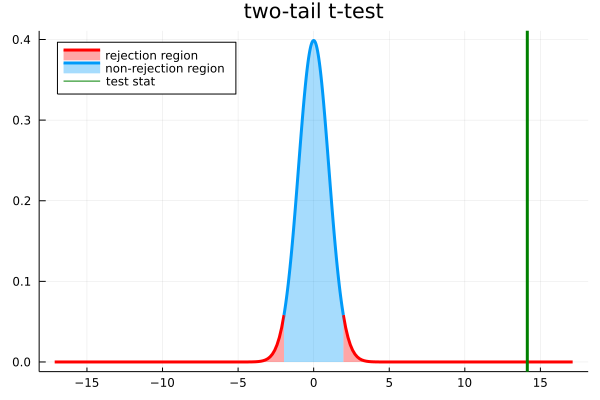

In [21]:
d = TDist(dof_residual(OLS_model))

lower_bar = -1 * abs(t_val) - 3
upper_bar = abs(t_val) + 3

lb = quantile(d, sig_level/2)
ub = quantile(d, 1-sig_level/2)

rg_low = range(lower_bar, lb; length = 100)
rg_upp = range(ub, upper_bar; length = 100)
rg_mid = range(lb, ub; length = 100)

plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = false, legend = :topleft)
plot!(rg_mid, pdf.(d, rg_mid), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="two-tail t-test")

## summarize previous codes into a function for t-test

In [22]:
function t_test_two(OLS_model, hyp_val, sig_level, coef_ind)
    
    t_val = (coef(OLS_model)[3] - hyp_val)/stderror(OLS_model)[3];
    p_two = 2 * cdf(TDist(dof_residual(OLS_model)), -1*abs(t_val))

    println("the two-tail p-value is ", p_two, "\n")
        
    d = TDist(dof_residual(OLS_model))

    lower_bar = -1 * abs(t_val) - 3
    upper_bar = abs(t_val) + 3

    lb = quantile(d, sig_level/2)
    ub = quantile(d, 1-sig_level/2)

    rg_low = range(lower_bar, lb; length = 100)
    rg_upp = range(ub, upper_bar; length = 100)
    rg_mid = range(lb, ub; length = 100)

    plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
    plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = false, legend = :topleft)
    plot!(rg_mid, pdf.(d, rg_mid), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
    display(plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="two-tail t-test"))
    
    return round(t_val, digits=5), round(p_two, digits=5)
    
end

t_test_two (generic function with 1 method)

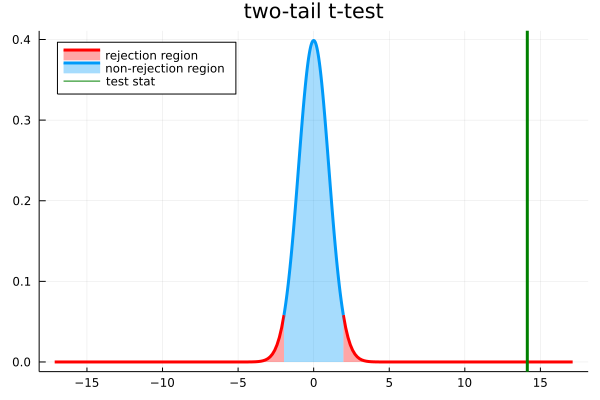

the two-tail p-value is 6.593679346062051e-41



(14.1341, 0.0)

In [23]:
tval, pval = t_test_two(OLS_model, hyp_val, sig_level, 2)

## left-tail test with p-value and rejection/non-rejection regions

In [24]:
hyp_val   = 4;
sig_level = 0.05;
t_val     = (coef(OLS_model)[3] - hyp_val)/stderror(OLS_model)[3];
p_left    = cdf(TDist(dof_residual(OLS_model)), t_val)

println("the left-tail p-value is ", p_left, "\n")

the left-tail p-value is 1.0



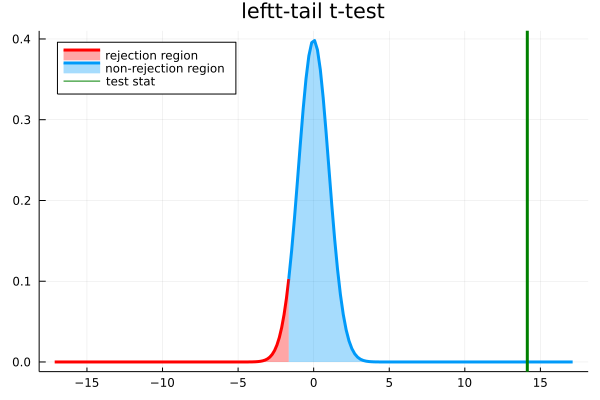

In [25]:
d = TDist(dof_residual(OLS_model))

lower_bar = -1 * abs(t_val) - 3
upper_bar = abs(t_val) + 3

lb = quantile(d, sig_level)

rg_low = range(lower_bar, lb; length = 100)
rg_upp = range(lb, upper_bar; length = 100)

plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="leftt-tail t-test")

## summarize previous codes into a function for t-test

In [26]:
function t_test_left(OLS_model, hyp_val, sig_level, coef_ind)
    
    t_val = (coef(OLS_model)[3] - hyp_val)/stderror(OLS_model)[3];
    p_left = cdf(TDist(dof_residual(OLS_model)), t_val)

    println("the left-tail p-value is ", p_left, "\n")
    
    d = TDist(dof_residual(OLS_model))

    lower_bar = -1 * abs(t_val) - 3
    upper_bar = abs(t_val) + 3

    lb = quantile(d, sig_level)

    rg_low = range(lower_bar, lb; length = 100)
    rg_upp = range(lb, upper_bar; length = 100)

    plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
    plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
    display(plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="leftt-tail t-test"))
    
    return round(t_val, digits=5), round(p_left, digits=5)
    
end

t_test_left (generic function with 1 method)

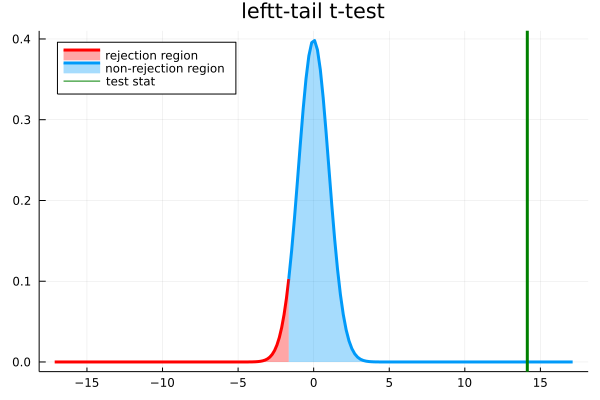

the left-tail p-value is 1.0



(14.1341, 1.0)

In [27]:
tval, pval = t_test_left(OLS_model, hyp_val, sig_level, 2)

## right-tail test with p-value and rejection/non-rejection regions

In [28]:
hyp_val   = 4;
sig_level = 0.05;
t_val     = (coef(OLS_model)[3] - hyp_val)/stderror(OLS_model)[3];
p_right   = 1 - cdf(TDist(dof_residual(OLS_model)), t_val);

println("the right-tail p-value is ", p_right, "\n")

the right-tail p-value is 0.0



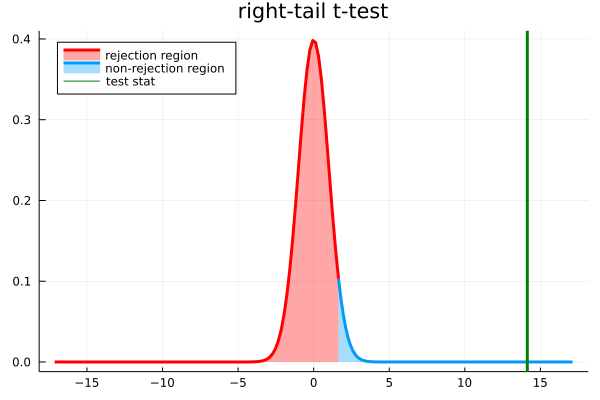

In [29]:
d = TDist(dof_residual(OLS_model))

lower_bar = -1 * abs(t_val) - 3
upper_bar = abs(t_val) + 3

lb = quantile(d, 1-sig_level)

rg_low = range(lower_bar, lb; length = 100)
rg_upp = range(lb, upper_bar; length = 100)

plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="right-tail t-test")

## summarize previous codes into a function for t-test

In [30]:
function t_test_right(OLS_model, hyp_val, sig_level, coef_ind)
    
    t_val   = (coef(OLS_model)[3] - hyp_val)/stderror(OLS_model)[3];
    p_right = 1 - cdf(TDist(dof_residual(OLS_model)), t_val);

    println("the right-tail p-value is ", p_right, "\n")
    
    d = TDist(dof_residual(OLS_model))

    lower_bar = -1 * abs(t_val) - 3
    upper_bar = abs(t_val) + 3

    lb = quantile(d, 1-sig_level)

    rg_low = range(lower_bar, lb; length = 100)
    rg_upp = range(lb, upper_bar; length = 100)

    plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
    plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
    display(plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="right-tail t-test"))
    
    return round(t_val, digits=5), round(p_right, digits=5)
    
end

t_test_right (generic function with 1 method)

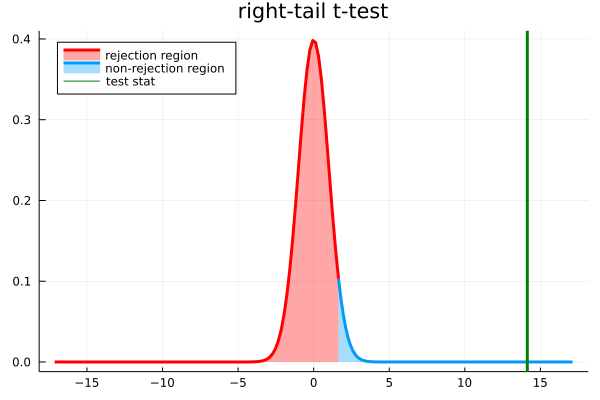

the right-tail p-value is 0.0



(14.1341, 0.0)

In [31]:
tval, pval = t_test_right(OLS_model, hyp_val, sig_level, 2)

# F-test for linear regression model

In [32]:
nullmodel = lm(@formula(score ~ 1 + age), df);
model     = lm(@formula(score ~ 1 + age + calculus), df);

ftest(nullmodel.model, model.model)

F-test: 2 models fitted on 856 observations
────────────────────────────────────────────────────────────────────────
     DOF  ΔDOF          SSR        ΔSSR      R²     ΔR²       F*   p(>F)
────────────────────────────────────────────────────────────────────────
[1]    3        152810.7760              0.0047                         
[2]    4     1  142839.0141  -9971.7619  0.0697  0.0649  59.5489  <1e-13
────────────────────────────────────────────────────────────────────────

In [33]:
nullmodel = lm(@formula(score ~ 1 + age), df);
model     = lm(@formula(score ~ 1 + age + calculus), df);
bigmodel  = lm(@formula(score ~ 1 + age + calculus + colgpa), df);

ftest(nullmodel.model, model.model, bigmodel.model)

F-test: 3 models fitted on 856 observations
──────────────────────────────────────────────────────────────────────────
     DOF  ΔDOF          SSR         ΔSSR      R²     ΔR²        F*   p(>F)
──────────────────────────────────────────────────────────────────────────
[1]    3        152810.7760               0.0047                          
[2]    4     1  142839.0141   -9971.7619  0.0697  0.0649   59.5489  <1e-13
[3]    5     1   98018.7263  -44820.2878  0.3616  0.2919  389.5876  <1e-70
──────────────────────────────────────────────────────────────────────────

# plot your regression results

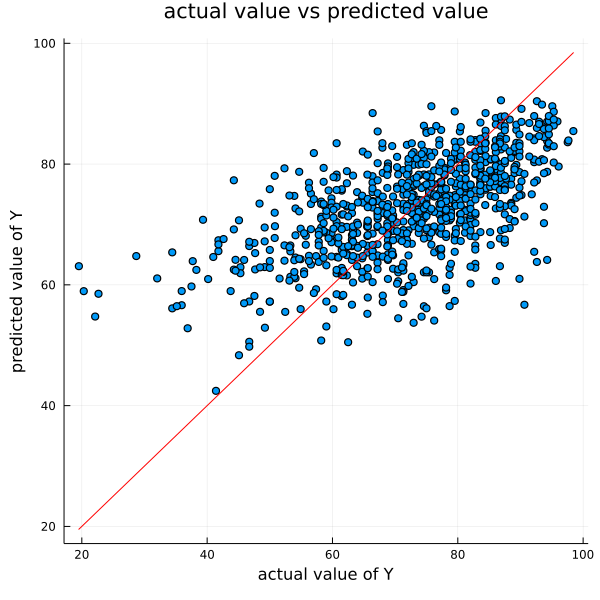

In [34]:
yhat = predict(OLS_model, df);

plot(df.score, yhat, seriestype=:scatter, legend=false, xlabel="actual value of Y", ylabel="predicted value of Y")
plot!(df.score, df.score, lc="red", title="actual value vs predicted value", size=(600,600))

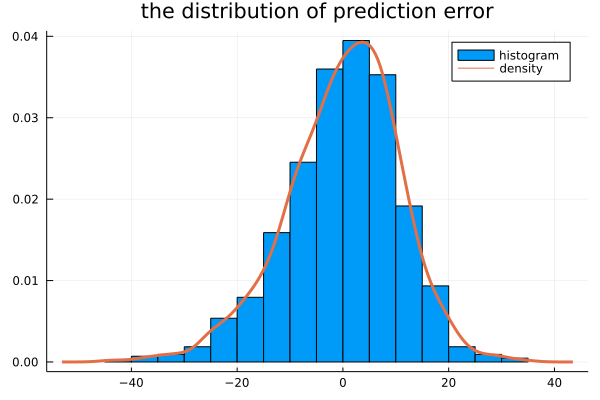

In [35]:
ehat = df.score - yhat;

histogram(ehat,normed=true, label="histogram")
density!(ehat, lw=3, label="density", title="the distribution of prediction error")

In [36]:
skewness(ehat)

-0.45047254731335323

In [37]:
kurtosis(ehat)

0.6619541200125374

In [46]:
run(`rm -rf 3_linear_regression.html`);
run(`jupyter nbconvert --to html 3_linear_regression.ipynb`);

[NbConvertApp] Converting notebook 3_linear_regression.ipynb to html
[NbConvertApp] Writing 1527119 bytes to 3_linear_regression.html
